In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('reviews_500.csv')

In [3]:
print(df.shape)
df.head(3)

(500, 10)


,id,profileName,text,date,title,rating,images,helpful,Style name,Colour
0,R3A7LKHO3QIEI6,Vijay Gandhi,\n Battery Issue.... Phone is Heating during ...,Reviewed in India on 19 April 2021,OnePlus 9R - Not As per Expectations,1,NaN,2,"12GB RAM, 256GB Storage",Lake Blue
1,RTC2JFCZRT3ML,NeHaaL,\n Facing heating issue while using camera ap...,Reviewed in India on 19 April 2021,Heating issue,1,NaN,1,"8GB RAM, 128GB Storage",Lake Blue
2,RKFNBV8UHH917,Mohit MJ,\n My first time buying a OnePlus phone and I...,Reviewed in India on 19 April 2021,Amazing - True Flagship,5,NaN,916,"8GB RAM, 128GB Storage",Lake Blue


In [4]:
# for all data is too heavy, make it slim by chose
df2 = df.sample(frac= 0.20,replace = True).reset_index(drop = True)

print(df2.shape)
df2.head()

(100, 10)


,id,profileName,text,date,title,rating,images,helpful,Style name,Colour
0,R2TQ3JT2BL13QI,sachin pardeshi,\n First time purchased one plus mobile. Writ...,Reviewed in India on 8 September 2021,Buying One plus is good decision,5,NaN,0,"8GB RAM, 128GB Storage",Lake Blue
1,R14KBY6UY8KRZ5,ASHOK KUMAR PS,"\n HI i am normal user, i never use games in ...",Reviewed in India on 24 April 2021,over heat issue and disappointed camera with o...,2,NaN,5,"8GB RAM, 128GB Storage",Lake Blue
2,R3OTFK2FKQO6TT,SitanshuTiwary,\n Gifted this phone to my father. Based on t...,Reviewed in India on 4 August 2021,Coming from Long Time OnePlus Phones User.,1,NaN,3,"8GB RAM, 128GB Storage",Carbon Black
3,R3FOGTWLPHAKR7,Shubham,\n Must buy phone.Only cons is when you play ...,Reviewed in India on 26 July 2021,Must buy this beast 🔥,5,NaN,0,"8GB RAM, 128GB Storage",Lake Blue
4,R29Q2B72DALSKS,Sayan Das,"\n First time buying one plus,my overall exp...",Reviewed in India on 10 June 2021,Still value for money,5,https://images-na.ssl-images-amazon.com/images...,1,"8GB RAM, 128GB Storage",Lake Blue


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           100 non-null    object
 1   profileName  100 non-null    object
 2   text         100 non-null    object
 3   date         100 non-null    object
 4   title        100 non-null    object
 5   rating       100 non-null    int64 
 6   images       26 non-null     object
 7   helpful      100 non-null    int64 
 8   Style name   100 non-null    object
 9   Colour       100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


In [6]:
print(df2.isna().sum())
df2.dropna(inplace= True)
df2.isna().sum()

id              0
profileName     0
text            0
date            0
title           0
rating          0
images         74
helpful         0
Style name      0
Colour          0
dtype: int64


id             0
profileName    0
text           0
date           0
title          0
rating         0
images         0
helpful        0
Style name     0
Colour         0
dtype: int64

In [7]:
print(df2['rating'].value_counts())
rating_pct = df2['rating'].value_counts()/len(df) * 100
rating_pct

5    15
4     9
1     2
Name: rating, dtype: int64


5    3.0
4    1.8
1    0.4
Name: rating, dtype: float64

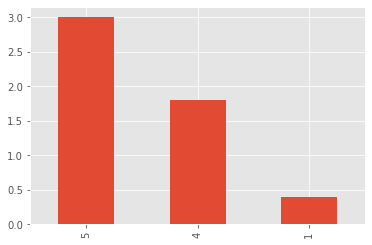

In [8]:
rating_pct.plot.bar()
plt.show()

<AxesSubplot:ylabel='rating'>

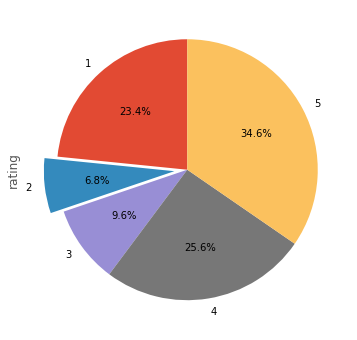

In [9]:
%matplotlib inline
plt.figure(figsize = (10,6))

df.groupby('rating').rating.count()
df.groupby('rating').rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [10]:
year= df['date'] 
year

0         Reviewed in India on 19 April 2021
1         Reviewed in India on 19 April 2021
2         Reviewed in India on 19 April 2021
3           Reviewed in India on 30 May 2021
4         Reviewed in India on 19 April 2021
                       ...                  
495        Reviewed in India on 18 July 2021
496        Reviewed in India on 22 July 2021
497    Reviewed in India on 8 September 2021
498        Reviewed in India on 10 July 2021
499         Reviewed in India on 8 June 2021
Name: date, Length: 500, dtype: object

In [11]:
df['year'] = df['date'].str[-4:]

df.head()

,id,profileName,text,date,title,rating,images,helpful,Style name,Colour,year
0,R3A7LKHO3QIEI6,Vijay Gandhi,\n Battery Issue.... Phone is Heating during ...,Reviewed in India on 19 April 2021,OnePlus 9R - Not As per Expectations,1,NaN,2,"12GB RAM, 256GB Storage",Lake Blue,2021
1,RTC2JFCZRT3ML,NeHaaL,\n Facing heating issue while using camera ap...,Reviewed in India on 19 April 2021,Heating issue,1,NaN,1,"8GB RAM, 128GB Storage",Lake Blue,2021
2,RKFNBV8UHH917,Mohit MJ,\n My first time buying a OnePlus phone and I...,Reviewed in India on 19 April 2021,Amazing - True Flagship,5,NaN,916,"8GB RAM, 128GB Storage",Lake Blue,2021
3,R2575KONXPQXVE,ASHANNITA,\n HiPlease consider this message with a seri...,Reviewed in India on 30 May 2021,Claim for Replacement of Oneplus 9R phone...,1,NaN,817,"8GB RAM, 128GB Storage",Lake Blue,2021
4,RWXB385NSDLJL,AshokA,\n Within 10 minutes of usage. It’s felt like...,Reviewed in India on 19 April 2021,Over heat mobile,1,https://images-na.ssl-images-amazon.com/images...,462,"8GB RAM, 128GB Storage",Lake Blue,2021


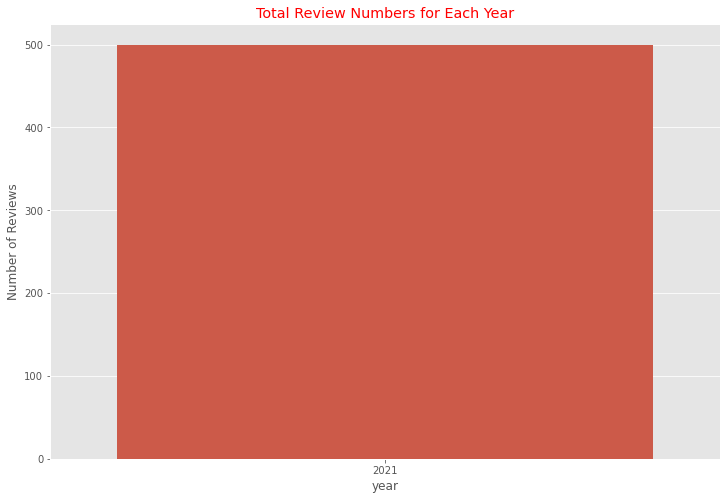

2021    500
Name: year, dtype: int64

In [12]:
##################################################################
# Total review for every year in the Headphone product
#####################################################################
plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

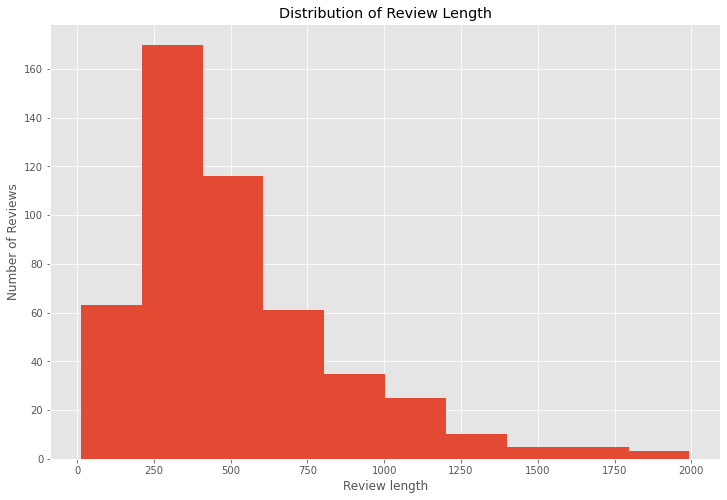

In [13]:
##########################################
## PLOT DISTRIBUTION OF REVIEW LENGTH   
##########################################
plt.figure(figsize = (15,8))

review_length = df["text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

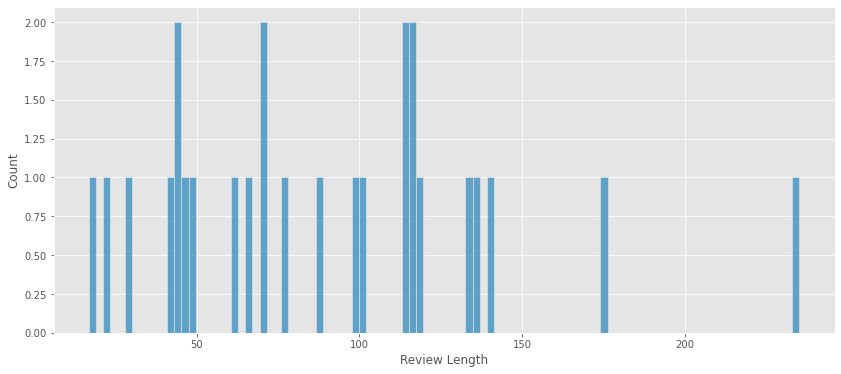

In [14]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = df2['text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

<Figure size 864x576 with 0 Axes>

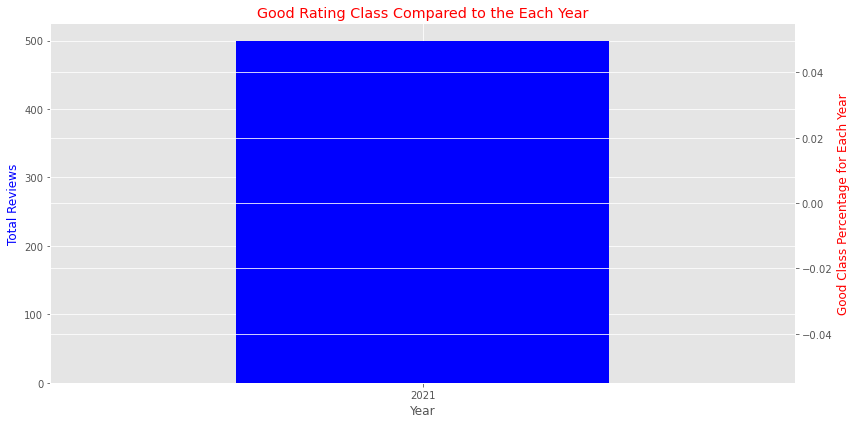

In [15]:
##################################################################
# Create a graph for each rating class to compare within the years
##################################################################

df['rating_class_num'] = df['rating'].map({'good': 1, 'bad': 0})

feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [16]:
#word_number_histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

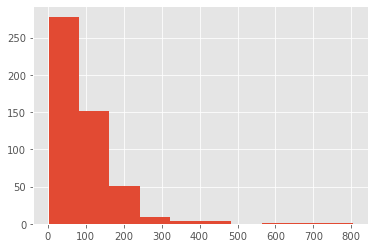

In [17]:
plot_word_number_histogram(df['text'])

In [18]:
#word_length_histogram

import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

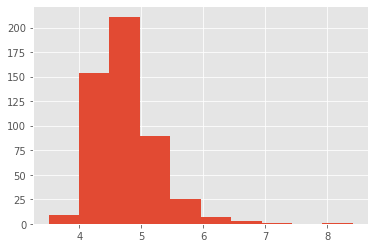

In [19]:
plot_word_length_histogram(df['text'])

In [20]:
#top_stopwords_barchart
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

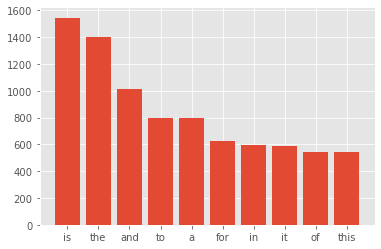

In [21]:
plot_top_stopwords_barchart(df['text'])

In [22]:
#top_non_stopwords_barchart
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

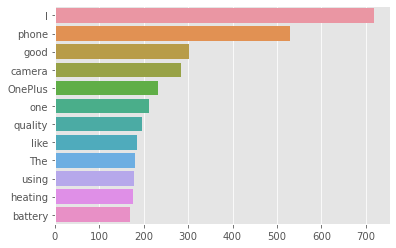

In [23]:
plot_top_non_stopwords_barchart(df['text'])

In [24]:
#top_ngrams_barchart

#Top N-grams Barchart
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

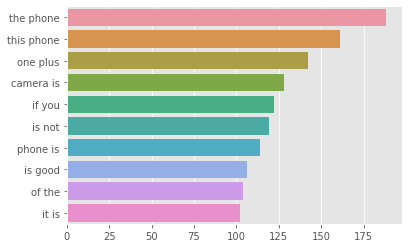

In [25]:
plot_top_ngrams_barchart(df['text'],2)

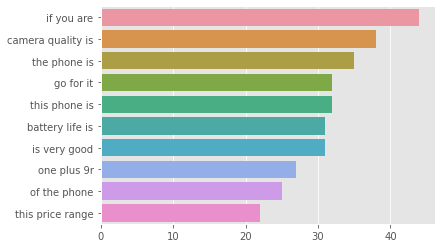

In [26]:
plot_top_ngrams_barchart(df['text'],3)

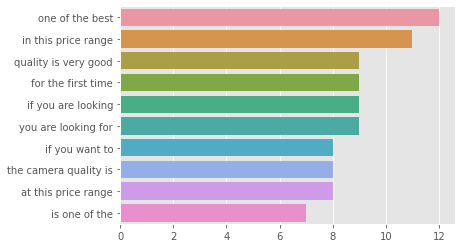

In [27]:
plot_top_ngrams_barchart(df['text'],4)

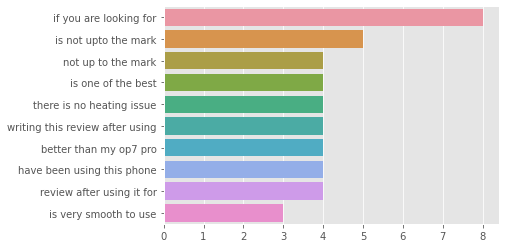

In [28]:
plot_top_ngrams_barchart(df['text'],5)

In [29]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pyLDAvis
import pyLDAvis.gensim_models

In [31]:

#Creating LDA visualization
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [32]:
lda_model, bow_corpus, dic = get_lda_objects(df['text'])

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
lda_model.show_topics()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.017*"phone" + 0.011*"good" + 0.010*"n\'t" + 0.009*"camera" + 0.009*"battery" + 0.008*"OnePlus" + 0.007*"one" + 0.006*"The" + 0.006*"heating" + 0.005*"like"'),
 (1,
  '0.016*"phone" + 0.013*"good" + 0.009*"camera" + 0.008*"quality" + 0.008*"device" + 0.008*"using" + 0.007*"issue" + 0.007*"n\'t" + 0.006*"day" + 0.006*"charging"'),
 (2,
  '0.027*"phone" + 0.012*"n\'t" + 0.011*"issue" + 0.010*"camera" + 0.010*"good" + 0.009*"quality" + 0.009*"like" + 0.008*"..." + 0.008*"heating" + 0.008*"OnePlus"'),
 (3,
  '0.025*"phone" + 0.016*"camera" + 0.014*"good" + 0.010*"one" + 0.009*"OnePlus" + 0.008*"plus" + 0.008*"day" + 0.007*"issue" + 0.007*"really" + 0.006*"The"')]

In [34]:
plot_lda_vis(lda_model, bow_corpus, dic)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.026919  0.024077       1        1  29.658717
3     -0.036248  0.029892       2        1  28.129440
0     -0.008260 -0.070105       3        1  24.984818
1      0.071428  0.016136       4        1  17.227025, topic_info=        Term        Freq       Total Category  logprob  loglift
90       ...  102.000000  102.000000  Default  30.0000  30.0000
310     plus   98.000000   98.000000  Default  29.0000  29.0000
289   device  135.000000  135.000000  Default  28.0000  28.0000
201     best   98.000000   98.000000  Default  27.0000  27.0000
104  Oneplus   49.000000   49.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
158     work   12.408326   59.270592   Topic4  -5.9546   0.1949
2    Battery   13.940977   87.562112   Topic4  -5.8381  -0.0788
69      like   15.894688  158.838663   Topic4  -5.7070  -0.5432
16   heating   15.297039  153.716490   Topic4  -5.7453  -0.5488
40       The   14.340871  157.776630   Topic4  -5.8098  -0.6394

[355 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
90        1  0.634811      ...
90        2  0.146495      ...
90        3  0.087897      ...
90        4  0.136728      ...
5021      3  0.810827  .Finger
...     ...       ...      ...
229       2  0.192706  writing
229       3  0.578118  writing
229       4  0.128471  writing
418       2  0.720330    wrong
418       3  0.240110    wrong

[588 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [35]:
#Polarity Histogram using TextBlob

from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


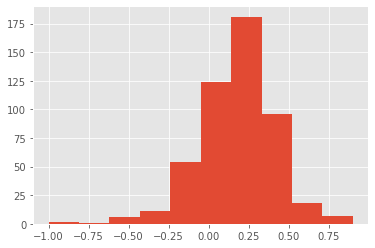

In [36]:
plot_polarity_histogram(df['text'])

In [37]:
# Sentiment Barchart

from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\icon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


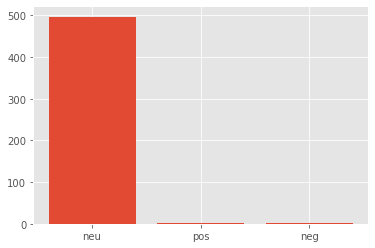

In [38]:
plot_sentiment_barchart(df['text'], method='Vader')

In [39]:
#Calculating Sentiment of Text
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
sent = SentimentIntensityAnalyzer()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['text']]
df['sentiment_score'] = polarity

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
#df = pd.read_csv('', usecols = ['text'])
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['text']]
df['sentiment_score'] = polarity
df.head()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,profileName,text,date,title,rating,images,helpful,Style name,Colour,year,rating_class_num,sentiment_score
0,R3A7LKHO3QIEI6,Vijay Gandhi,\n Battery Issue.... Phone is Heating during ...,Reviewed in India on 19 April 2021,OnePlus 9R - Not As per Expectations,1,NaN,2,"12GB RAM, 256GB Storage",Lake Blue,2021,NaN,0.00
1,RTC2JFCZRT3ML,NeHaaL,\n Facing heating issue while using camera ap...,Reviewed in India on 19 April 2021,Heating issue,1,NaN,1,"8GB RAM, 128GB Storage",Lake Blue,2021,NaN,0.40
2,RKFNBV8UHH917,Mohit MJ,\n My first time buying a OnePlus phone and I...,Reviewed in India on 19 April 2021,Amazing - True Flagship,5,NaN,916,"8GB RAM, 128GB Storage",Lake Blue,2021,NaN,0.49
3,R2575KONXPQXVE,ASHANNITA,\n HiPlease consider this message with a seri...,Reviewed in India on 30 May 2021,Claim for Replacement of Oneplus 9R phone...,1,NaN,817,"8GB RAM, 128GB Storage",Lake Blue,2021,NaN,0.98
4,RWXB385NSDLJL,AshokA,\n Within 10 minutes of usage. It’s felt like...,Reviewed in India on 19 April 2021,Over heat mobile,1,https://images-na.ssl-images-amazon.com/images...,462,"8GB RAM, 128GB Storage",Lake Blue,2021,NaN,0.61


In [43]:

#Calculating Sentiment of Text
#Using Positive and Negative Word Count – With Normalization for Calculating Sentiment Score
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
def text_prep(x):
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
    
     return lemmatize

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
preprocess_tag = [text_prep(i) for i in df['text']]
df["preprocess_txt"] = preprocess_tag

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
df = pd.read_csv('reviews_500.csv', usecols=['text'])
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in df['text']]
df["preprocess_txt"] = preprocess_tag
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg
df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)
df.head(20)


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,\n Battery Issue.... Phone is Heating during ...,"[battery, issue, phone, heating, charging, run...",7,0,1,-0.14
1,\n Facing heating issue while using camera ap...,"[facing, heating, issue, using, camera, app, g...",20,3,5,-0.10
2,\n My first time buying a OnePlus phone and I...,"[first, time, buying, oneplus, phone, really, ...",76,10,6,0.05
3,\n HiPlease consider this message with a seri...,"[hiplease, consider, message, serious, note, o...",111,7,4,0.03
4,\n Within 10 minutes of usage. It’s felt like...,"[within, minute, usage, felt, like, heat, expe...",9,2,0,0.22
5,\n I don't why no reviewer is speaking about ...,"[reviewer, speaking, heating, normal, usage]",5,0,0,0.00
6,"\n Iam OnePlus user since 4 years, I exchange...","[iam, oneplus, user, since, year, exchange, on...",34,7,4,0.09
7,\n After 5 days of usage writing this review....,"[day, usage, writing, review, best, camera, qu...",60,9,4,0.08
8,\n Writing after 4 Days of use1. Heating Issu...,"[writing, day, use, heating, issue, start, not...",56,13,5,0.14
9,\n I am writing down this after using for a c...,"[writing, using, couple, day, got, carbon, bla...",88,17,7,0.11


In [52]:
#total negetive count
df['neg_count'].count()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500

In [53]:
#total positive count
df['pos_count'].count()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500

In [54]:
#Using Positive and Negative Word Counts – With Semi Normalization to calculate Sentiment Score
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
df = pd.read_csv('reviews_500.csv', usecols=['text'])
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in df['text']]
df["preprocess_txt"] = preprocess_tag
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
df['sentiment'] = round(df['pos_count'] / (df['neg_count']+1), 2)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
df = pd.read_csv('reviews_500.csv', usecols=['text'])
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in df['text']]
df["preprocess_txt"] = preprocess_tag
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg
df['sentiment'] = round(df['pos_count'] / (df['neg_count']+1), 2)
df.head(20)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,preprocess_txt,pos_count,neg_count,sentiment
0,\n Battery Issue.... Phone is Heating during ...,"[battery, issue, phone, heating, charging, run...",0,1,0.00
1,\n Facing heating issue while using camera ap...,"[facing, heating, issue, using, camera, app, g...",3,5,0.50
2,\n My first time buying a OnePlus phone and I...,"[first, time, buying, oneplus, phone, really, ...",10,6,1.43
3,\n HiPlease consider this message with a seri...,"[hiplease, consider, message, serious, note, o...",7,4,1.40
4,\n Within 10 minutes of usage. It’s felt like...,"[within, minute, usage, felt, like, heat, expe...",2,0,2.00
5,\n I don't why no reviewer is speaking about ...,"[reviewer, speaking, heating, normal, usage]",0,0,0.00
6,"\n Iam OnePlus user since 4 years, I exchange...","[iam, oneplus, user, since, year, exchange, on...",7,4,1.40
7,\n After 5 days of usage writing this review....,"[day, usage, writing, review, best, camera, qu...",9,4,1.80
8,\n Writing after 4 Days of use1. Heating Issu...,"[writing, day, use, heating, issue, start, not...",13,5,2.17
9,\n I am writing down this after using for a c...,"[writing, using, couple, day, got, carbon, bla...",17,7,2.12


In [57]:
#total negetive count
df['neg_count'].count()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500

In [58]:
#total positive count
df['pos_count'].count()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500

In [59]:
#Using VADER SentimentIntensityAnalyser to calculate Sentiment Score
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
sent = SentimentIntensityAnalyzer()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
df = pd.read_csv('reviews_500.csv', usecols=['text'])

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['text']]
df['sentiment_score'] = polarity

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
df = pd.read_csv('reviews_500.csv', usecols=['text'])
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['text']]
df['sentiment_score'] = polarity
df.head()

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,sentiment_score
0,\n Battery Issue.... Phone is Heating during ...,0.00
1,\n Facing heating issue while using camera ap...,0.40
2,\n My first time buying a OnePlus phone and I...,0.49
3,\n HiPlease consider this message with a seri...,0.98
4,\n Within 10 minutes of usage. It’s felt like...,0.61


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


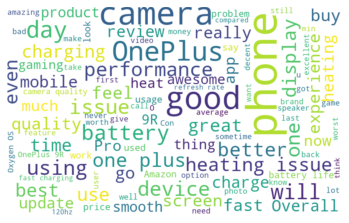

In [64]:
# all reivie joint into 1 sentence
txt = ' '.join(review for review in df.text)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [65]:
#Data Preprocessing and Transformation

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
df3 = pd.read_csv('reviews_500.csv')

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
df2 = pd.DataFrame(df3,columns = ['rating','text'])
df2.rename(columns = {'rating':'Rating','text':'Review'},inplace = True)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
df2['Sentiment'] = df2['Rating'].apply(apply_sentiment)
df2.drop(['Rating'],axis = 1, inplace = True)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
sentiment = df2['Sentiment'].value_counts()
sentiment

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    349
0    151
Name: Sentiment, dtype: int64

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


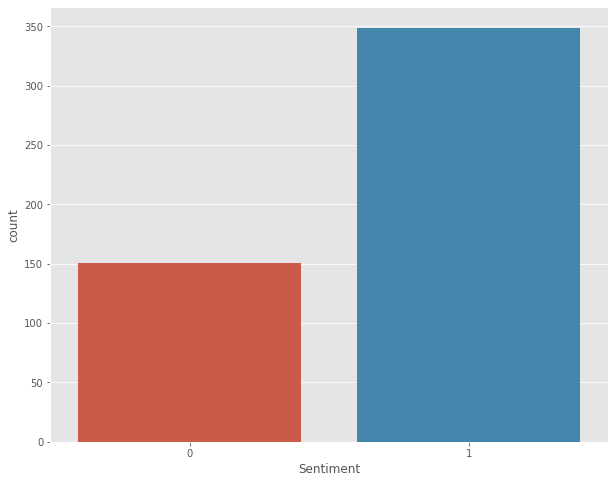

In [130]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df2, x = 'Sentiment')
plt.show()

In [131]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \[
<>:5: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \[
<>:5: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \w
<ipython-input-131-a830069e5956>:4: DeprecationWarning: invalid escape sequence \[
  Review = re.sub('\[.*?\]', '', Review)
<ipython-input-131-a830069e5956>:5: DeprecationWarning: invalid escape sequence \S
  Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
<ipython-input-131-a830069e5956>:9: DeprecationWarning: inva

In [132]:
df2['Review']

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      \n  Battery Issue.... Phone is Heating during ...
1      \n  Facing heating issue while using camera ap...
2      \n  My first time buying a OnePlus phone and I...
3      \n  HiPlease consider this message with a seri...
4      \n  Within 10 minutes of usage. It’s felt like...
                             ...                        
495    \n  Amazon Has selling Duplicate And Damaged o...
496    \n  1st day review..The battery got charged in...
497    \n  Ear phones could have been provided by One...
498    \n  Face recognition sometimes works even when...
499    \n  It's a good choice for a casual mobile use...
Name: Review, Length: 500, dtype: object

In [133]:
df2['Review'] = df2['Review'].apply(clean_text)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
df2.head(10)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Sentiment
0,battery issue phone is heating during chargi...,0
1,facing heating issue while using camera app ...,0
2,my first time buying a oneplus phone and i r...,1
3,hiplease consider this message with a seriou...,0
4,within minutes of usage its felt like over ...,0
5,i dont why no reviewer is speaking about it ...,0
6,iam oneplus user since years i exchange my ...,0
7,after days of usage writing this best came...,1
8,writing after days of heating issues you w...,1
9,i am writing down this after using for a cou...,1


In [135]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopword = []
sentence = df2['Review'][0]


#words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df2['reviews_text'] = df2['Review'].apply(lambda row: remove_stopword(stop_words, row))

## need to convert list into string
df2['reviews_text'] = df2['reviews_text'].apply(lambda row: ','.join(row))

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
df2.head(50)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Sentiment,reviews_text
0,battery issue phone is heating during chargi...,0,"battery,issue,phone,heating,charging,running,a..."
1,facing heating issue while using camera app ...,0,"facing,heating,issue,using,camera,app,general,..."
2,my first time buying a oneplus phone and i r...,1,"first,time,buying,oneplus,phone,really,like,fi..."
3,hiplease consider this message with a seriou...,0,"hiplease,consider,message,serious,note,one,plu..."
4,within minutes of usage its felt like over ...,0,"within,minutes,usage,felt,like,heat,cant,exper..."
5,i dont why no reviewer is speaking about it ...,0,"dont,reviewer,speaking,heating,normal,usage"
6,iam oneplus user since years i exchange my ...,0,"iam,oneplus,user,since,years,exchange,one,plus..."
7,after days of usage writing this best came...,1,"days,usage,writing,best,camera,quality,snapdra..."
8,writing after days of heating issues you w...,1,"writing,days,heating,issues,start,noticing,fir..."
9,i am writing down this after using for a cou...,1,"writing,using,couple,days,got,carbon,black,one..."


In [137]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
X = df2['reviews_text']
y = df2['Sentiment']

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((400,), (100,), (400,))

In [140]:
fit_model = clf.fit(X_train,y_train)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
y_pred = clf.predict(X_test)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
print('Training accuracy:', fit_model.score(X_train,y_train))
print('Test accuracy:', fit_model.score(X_test,y_test))

Training accuracy: 0.7675
Test accuracy: 0.68


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.68      1.00      0.81        68

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100

[[ 0 32]
 [ 0 68]]


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
